In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Define the simulation parameters
n_channels = 1
sfreq = 300  # sampling frequency
duration = 120  # duration in seconds

# Create an Info object with the simulation parameters
info = mne.create_info(n_channels, sfreq, ch_types='eeg')

# Generate random data to simulate the EEG signal
data = np.random.randn(n_channels, int(duration * sfreq))

# Create a Raw object with the simulated data
raw_simulated = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=1, n_times=36000
    Range : 0 ... 35999 =      0.000 ...   119.997 secs
Ready.


In [5]:
eeg_data = raw_simulated.get_data()
eeg_data = np.squeeze(eeg_data)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1981 samples (6.603 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 8

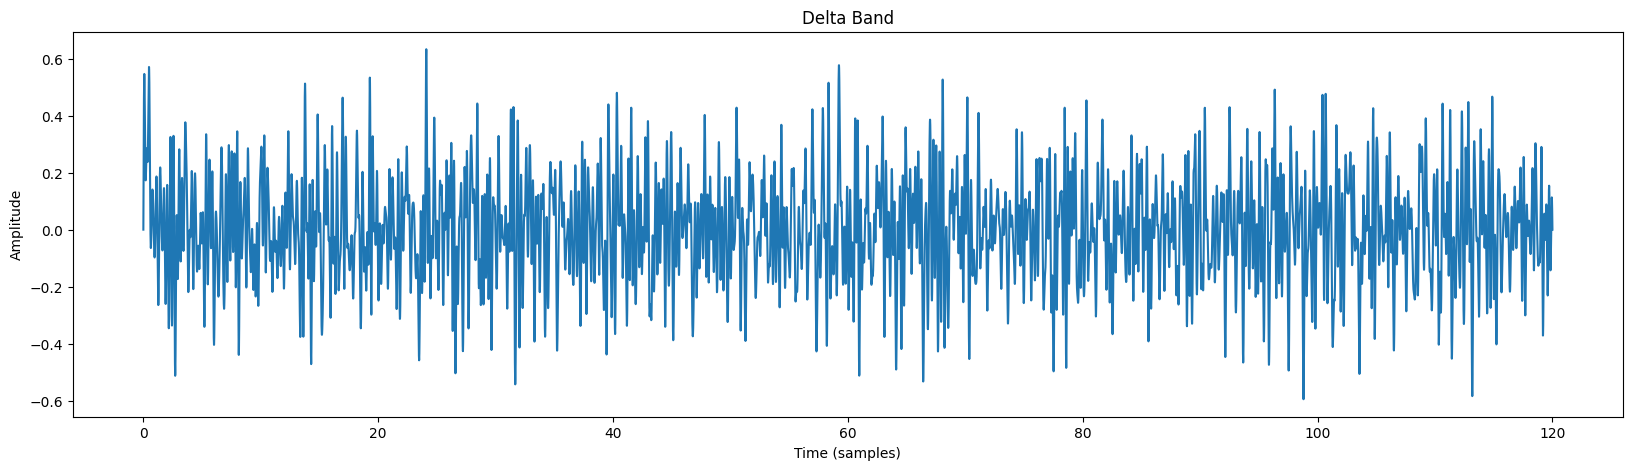

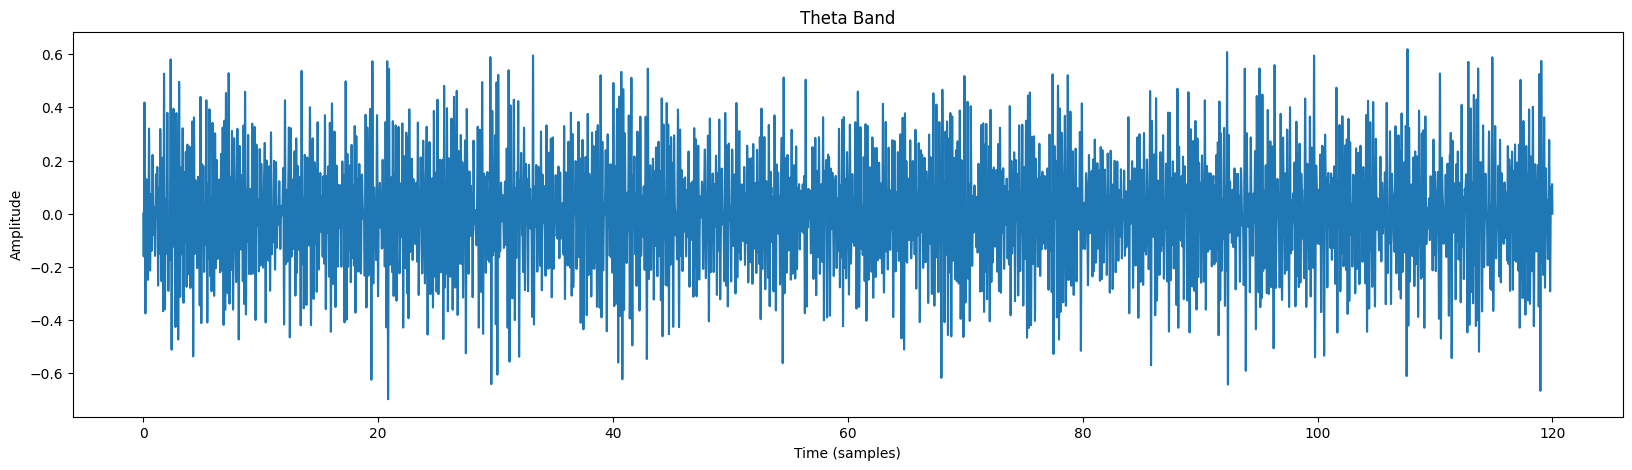

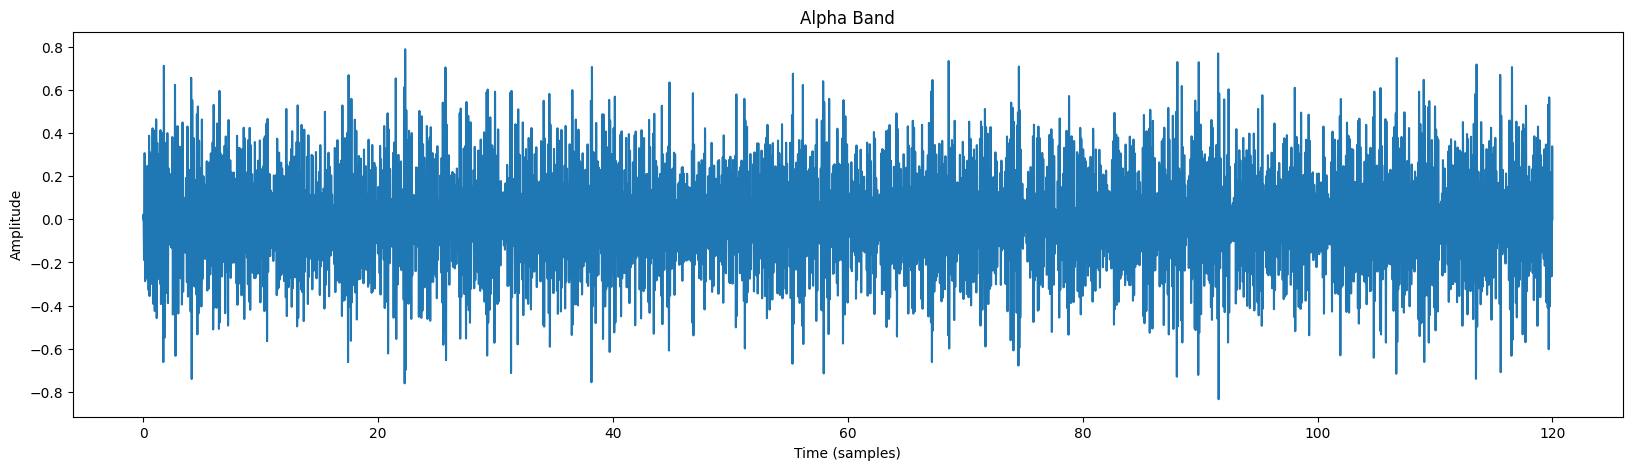

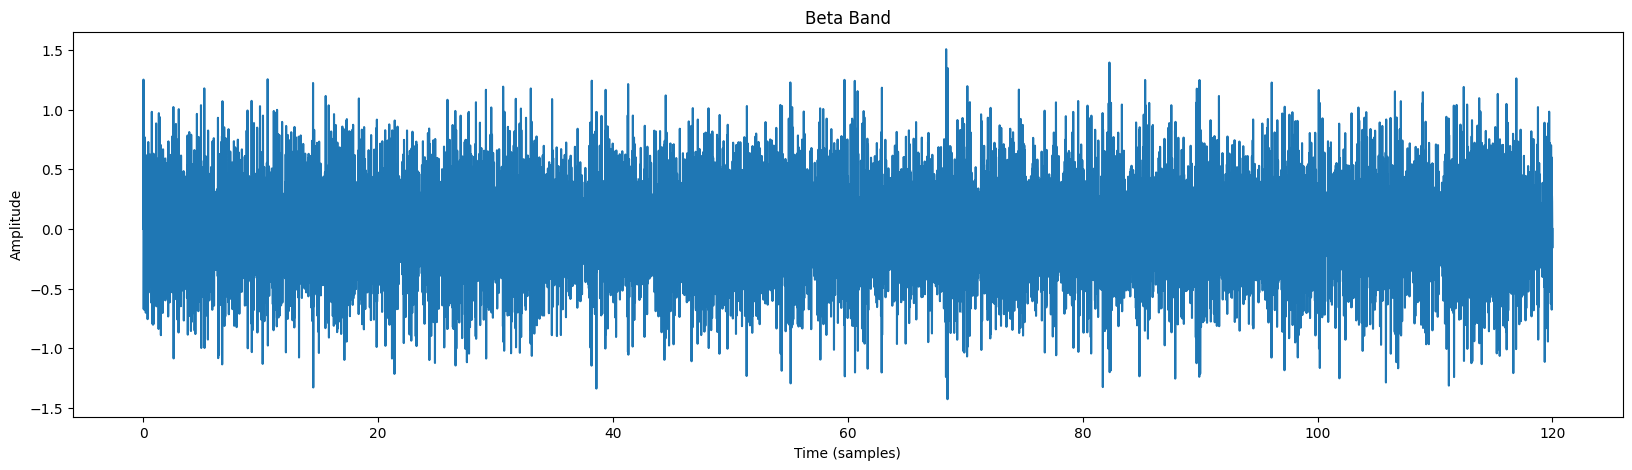

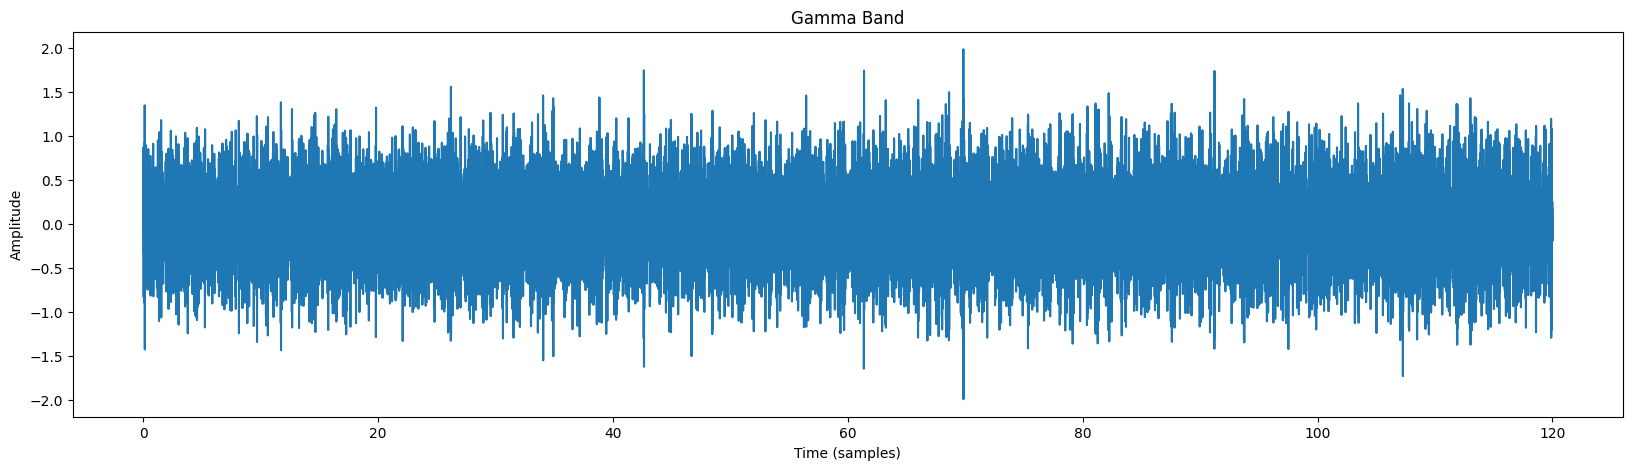

In [9]:
# Define the frequency bands
freq_bands = {'delta': (0.5, 4),
              'theta': (4, 8),
              'alpha': (8, 13),
              'beta': (13, 30),
              'gamma': (30, 50)}

# Filter the simulated EEG data for each frequency band
filtered_eeg = {}
for band, freq_range in freq_bands.items():
    # Apply a bandpass filter for the current frequency band
    filtered_data = raw_simulated.copy().filter(freq_range[0], freq_range[1], fir_design='firwin')
    
    # Extract the filtered data and store it in the filtered_eeg dictionary
    filtered_eeg[band] = filtered_data.get_data()

time_axis = raw_simulated.times

# Plot the filtered EEG data for each frequency band
for band, data in filtered_eeg.items():
    plt.figure(figsize=(20, 5))
    plt.plot(time_axis,np.squeeze(data).T)
    plt.title(f'{band.capitalize()} Band')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()
